### Implementig multivariate linear regression from scratch and also comparing it with inbuilt sklearn algorthm. I will optimize it using Gradient Descent.

In [33]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import math

#### The steps are as following:
#### 1. Define a class linearregression which contains all necessary functions
#### 2. Implement mean_squared

In [46]:
class LinearRegression:
    def __init__(self, lr=0.01, epochs=10000):
        self.learning_rate = lr
        self.n_iterations = epochs
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def root_mean_squared_error(y, y_hat):
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return math.sqrt(error / len(y))
    
    def fit(self, X, y):
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self.root_mean_squared_error(y, y_hat)
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))
            
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
        
        
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

In [47]:
# Testing the algorihtm. We will use inbuilt diabetes dataset
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
data=load_diabetes()
X=data.data
y=data.target
# Splitting into training and testing sets for training n testing
from sklearn.model_selection import train_test_split



In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

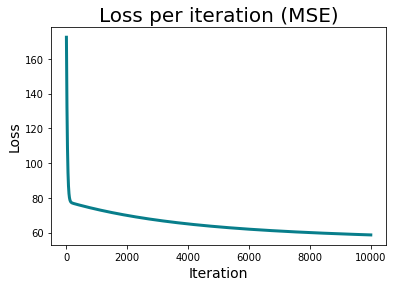

In [49]:
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

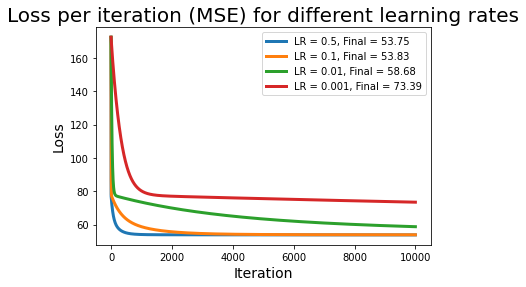

In [50]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(lr=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
plt.title('Loss per iteration (MSE) for different learning rates', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.show()

In [51]:
model = LinearRegression(lr=0.5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

model.root_mean_squared_error(y_test, preds)

53.72004457129971

In [52]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2 = r2_score( y_test,preds)
print("The r2 score is:",r2)

The r2 score is: 0.4553113376659288


In [55]:
# Comparing the model with inbuilt linear regression model in sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
mean_squared_error(y_test, lr_preds)


2900.1732878832318

In [56]:
# r2 score for inbuilt linear regression model is:
r2 = r2_score( y_test,lr_preds)
print("The r2 score is:",r2)

The r2 score is: 0.45260660216173787


### This was just a basic implementation so I am not caring about accuracy here. I just did this to understand the things under the hood.